In [1]:
import ROOT

Welcome to JupyROOT 6.20/02


In [2]:
d = ROOT.RDataFrame("ntuples/genT", "../merged.root")

In [64]:
d_H = d.Define("H_mask", "abs(gen_ID) == 25")
h_pt_H = d_H.Define("pt_H", "gen_pt[H_mask]").Histo1D(("pt_H", "pt_H", 100, 0., 200.), "pt_H")

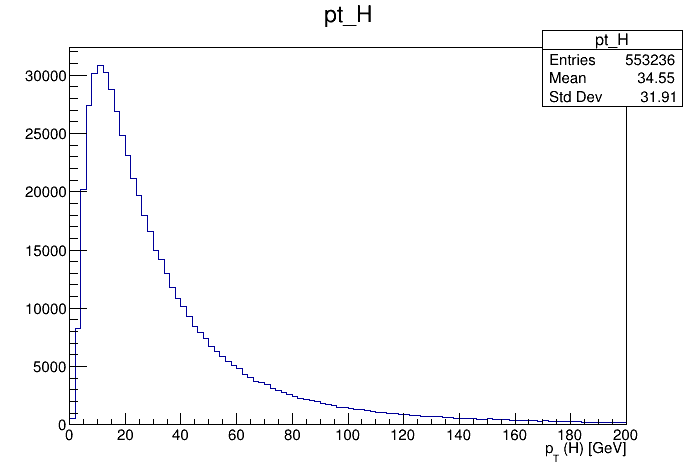

In [65]:
c = ROOT.TCanvas()
h_pt_H.Draw()
h_pt_H.GetXaxis().SetTitle("p_{T} (H) [GeV]")
c.Draw()

In [58]:
d_S = d.Define("S_mask", "abs(gen_ID) == 9000006")
h_pt_S = d_S.Define("pt_S", "gen_pt[S_mask]").Histo1D("pt_S")
h_deta_S = d_S.Define("deta_S", "gen_eta[S_mask][0] - gen_eta[S_mask][1]").Histo1D("deta_S")
h_red_dphi_S = d_S.Define("dphi_S", "abs(gen_phi[S_mask][0] - gen_phi[S_mask][1])").\
    Define("red_dphi_S", "abs(dphi_S - 3.141592 * (1 + (dphi_S-3.141592)/abs(dphi_S-3.141592)))").\
    Histo1D("red_dphi_S")

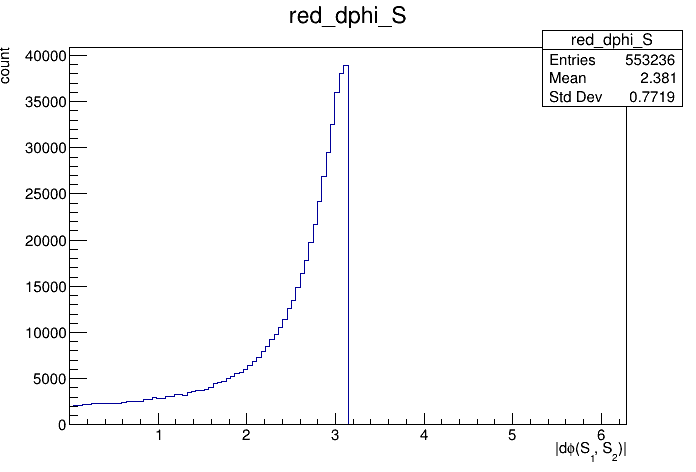

In [4]:
c = ROOT.TCanvas()
h_red_dphi_S.Draw()
h_red_dphi_S.GetXaxis().SetTitle("|d#phi(S_{1}, S_{2})|")
c.Draw()

In [47]:
d_tau = d.Define("tau_mask", "abs(gen_ID) == 15")
d_tau = d_tau.Define("deta_tau01", "abs(gen_eta[tau_mask][0] - gen_eta[tau_mask][1])")
d_tau = d_tau.Define("deta_tau12", "abs(gen_eta[tau_mask][1] - gen_eta[tau_mask][2])")
d_tau = d_tau.Define("deta_tau23", "abs(gen_eta[tau_mask][2] - gen_eta[tau_mask][3])")
d_tau = d_tau.Define("dphi_tau01", "abs(gen_phi[tau_mask][0] - gen_phi[tau_mask][1])")
d_tau = d_tau.Define("dphi_tau12", "abs(gen_phi[tau_mask][1] - gen_phi[tau_mask][2])")
d_tau = d_tau.Define("dphi_tau23", "abs(gen_phi[tau_mask][2] - gen_phi[tau_mask][3])")
d_tau = d_tau.Define("red_dphi_tau01", "abs(dphi_tau01 - 3.141592 * (1 + (dphi_tau01-3.141592)/abs(dphi_tau01-3.141592)))")
d_tau = d_tau.Define("red_dphi_tau12", "abs(dphi_tau12 - 3.141592 * (1 + (dphi_tau12-3.141592)/abs(dphi_tau12-3.141592)))")
d_tau = d_tau.Define("red_dphi_tau23", "abs(dphi_tau23 - 3.141592 * (1 + (dphi_tau23-3.141592)/abs(dphi_tau23-3.141592)))")
d_tau = d_tau.Define("dR_tau01", "sqrt(pow(deta_tau01,2) + pow(red_dphi_tau01,2))")
d_tau = d_tau.Define("dR_tau12", "sqrt(pow(deta_tau12,2) + pow(red_dphi_tau12,2))")
d_tau = d_tau.Define("dR_tau23", "sqrt(pow(deta_tau23,2) + pow(red_dphi_tau23,2))")

In [30]:
h_dphi_tau01 = d_tau.Histo1D("red_dphi_tau01")
h_dphi_tau12 = d_tau.Histo1D("red_dphi_tau12")
h_dphi_tau23 = d_tau.Histo1D("red_dphi_tau23")

<ROOT.TLegend object ("TPave") at 0xa4bba90>

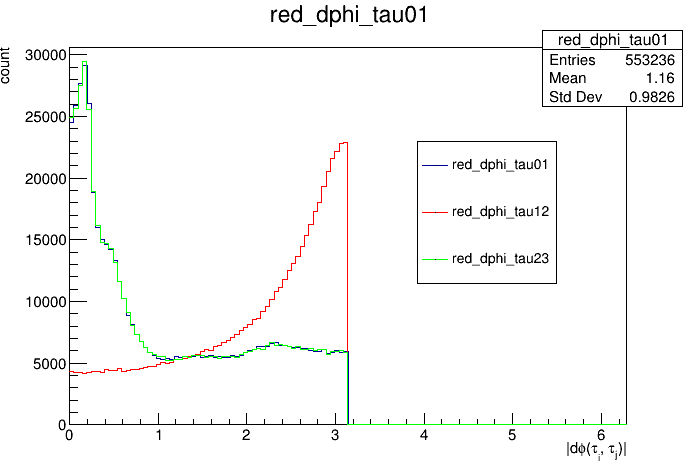

In [8]:
c = ROOT.TCanvas()
h_dphi_tau01.Draw()
h_dphi_tau01.GetXaxis().SetTitle("|d#phi(#tau_{i}, #tau_{j})|")
h_dphi_tau12.Draw("SAME")
h_dphi_tau12.SetLineColor(ROOT.kRed)
h_dphi_tau23.Draw("SAME")
h_dphi_tau23.SetLineColor(ROOT.kGreen)
c.Draw()
c.BuildLegend(0.6, 0.4, 0.8, 0.7)

In [48]:
d_tau = d_tau.Define("pt_tau_0", "gen_pt[tau_mask][0]")
d_tau = d_tau.Define("pt_tau_1", "gen_pt[tau_mask][1]")
d_tau = d_tau.Define("pt_tau_2", "gen_pt[tau_mask][2]")
d_tau = d_tau.Define("pt_tau_3", "gen_pt[tau_mask][3]")
h_pt_tau_0 = d_tau.Histo1D(("pt_tau_0", "pt_tau_0", 100, 0., 200.), "pt_tau_0")
h_pt_tau_1 = d_tau.Histo1D(("pt_tau_1", "pt_tau_1", 100, 0., 200.), "pt_tau_1")
h_pt_tau_2 = d_tau.Histo1D(("pt_tau_2", "pt_tau_2", 100, 0., 200.), "pt_tau_2")
h_pt_tau_3 = d_tau.Histo1D(("pt_tau_3", "pt_tau_3", 100, 0., 200.), "pt_tau_3")

<ROOT.TLegend object ("TPave") at 0x198b2820>

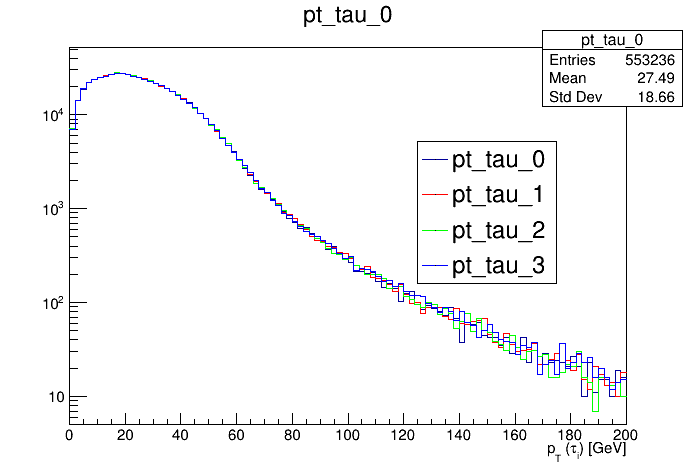

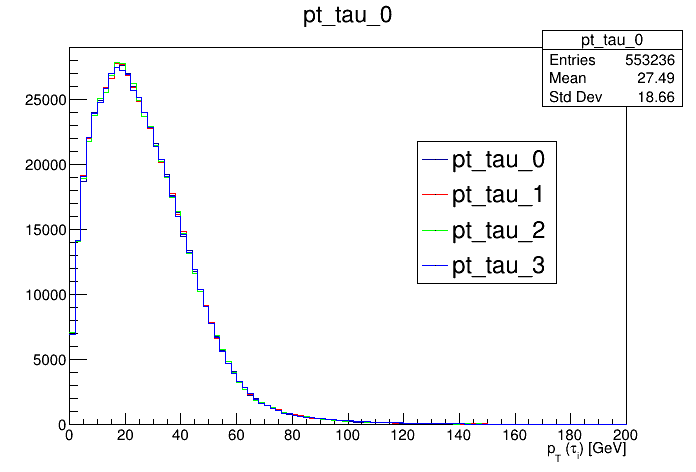

In [49]:
c = ROOT.TCanvas()
h_pt_tau_0.Draw()
h_pt_tau_0.GetXaxis().SetTitle("p_{T} (#tau_{i}) [GeV]")
h_pt_tau_1.Draw("SAME")
h_pt_tau_1.SetLineColor(ROOT.kRed)
h_pt_tau_2.Draw("SAME")
h_pt_tau_2.SetLineColor(ROOT.kGreen)
h_pt_tau_3.Draw("SAME")
h_pt_tau_3.SetLineColor(ROOT.kBlue)
c.SetLogy()
c.Draw()
c.BuildLegend(0.6, 0.4, 0.8, 0.7)

c2 = ROOT.TCanvas()
h_pt_tau_0.Draw("")
h_pt_tau_0.GetXaxis().SetTitle("p_{T} (#tau_{i}) [GeV]")
h_pt_tau_1.Draw("SAME")
h_pt_tau_1.SetLineColor(ROOT.kRed)
h_pt_tau_2.Draw("SAME")
h_pt_tau_2.SetLineColor(ROOT.kGreen)
h_pt_tau_3.Draw("SAME")
h_pt_tau_3.SetLineColor(ROOT.kBlue)
c2.Draw()
c2.BuildLegend(0.6, 0.4, 0.8, 0.7)

In [59]:
d_S = d_S.Define("pt_S_0", "gen_pt[S_mask][0]")
d_S = d_S.Define("pt_S_1", "gen_pt[S_mask][1]")
h_pt_S_0 = d_S.Histo1D(("pt_S_0", "pt_S_0", 100, 0, 200), "pt_S_0")
h_pt_S_1 = d_S.Histo1D(("pt_S_1", "pt_S_1", 100, 0, 200), "pt_S_1")

<ROOT.TLegend object ("TPave") at 0x18f6f640>

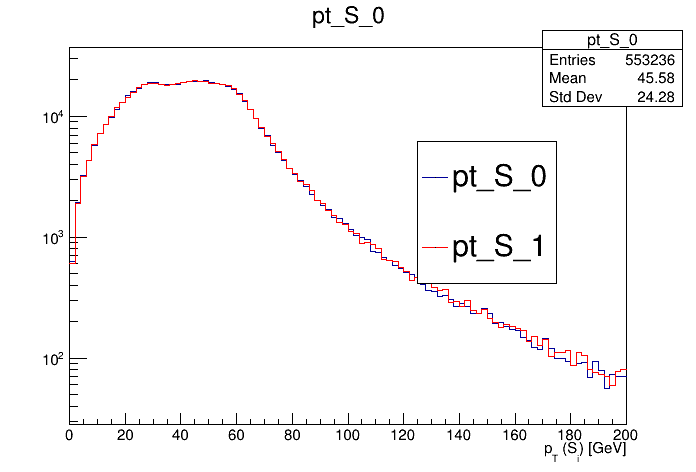

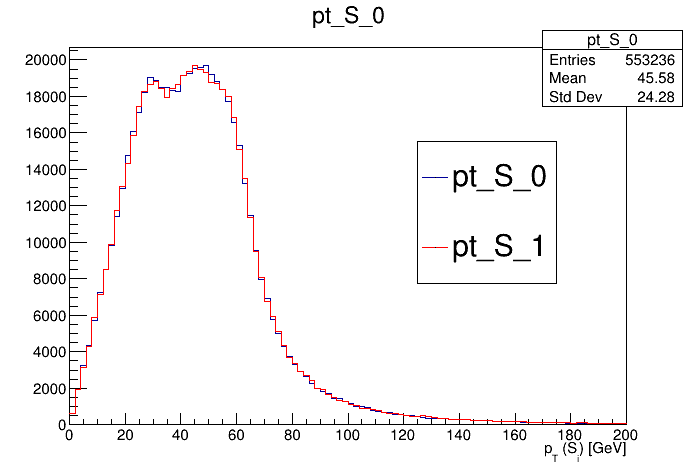

In [61]:
c = ROOT.TCanvas()
h_pt_S_0.Draw()
h_pt_S_0.GetXaxis().SetTitle("p_{T} (S_{i}) [GeV]")
h_pt_S_1.Draw("SAME")
h_pt_S_1.SetLineColor(ROOT.kRed)
c.SetLogy()
c.Draw()
c.BuildLegend(0.6, 0.4, 0.8, 0.7)

c2 = ROOT.TCanvas()
h_pt_S_0.Draw()
h_pt_S_0.GetXaxis().SetTitle("p_{T} (S_{i}) [GeV]")
h_pt_S_1.Draw("SAME")
h_pt_S_1.SetLineColor(ROOT.kRed)
c2.Draw()
c2.BuildLegend(0.6, 0.4, 0.8, 0.7)

In [117]:
d_tau = d_tau.Define("vxy_tau_0", "gen_vxy[tau_mask][0]")
d_tau = d_tau.Define("vxy_tau_1", "gen_vxy[tau_mask][1]")
d_tau = d_tau.Define("vxy_tau_2", "gen_vxy[tau_mask][2]")
d_tau = d_tau.Define("vxy_tau_3", "gen_vxy[tau_mask][3]")
h_vxy_tau_0 = d_tau.Histo1D("vxy_tau_0")
h_vxy_tau_1 = d_tau.Histo1D("vxy_tau_1")
h_vxy_tau_2 = d_tau.Histo1D("vxy_tau_2")
h_vxy_tau_3 = d_tau.Histo1D("vxy_tau_3")

<ROOT.TLegend object ("TPave") at 0x19484bb0>

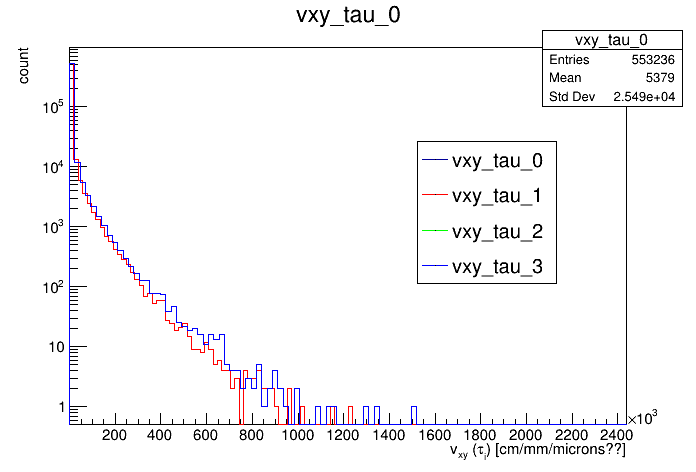

In [96]:
c = ROOT.TCanvas()
h_vxy_tau_0.Draw()
h_vxy_tau_0.GetXaxis().SetTitle("v_{xy} (#tau_{i}) [cm/mm/microns??]")
h_vxy_tau_1.Draw("SAME")
h_vxy_tau_1.SetLineColor(ROOT.kRed)
h_vxy_tau_2.Draw("SAME")
h_vxy_tau_2.SetLineColor(ROOT.kGreen)
h_vxy_tau_3.Draw("SAME")
h_vxy_tau_3.SetLineColor(ROOT.kBlue)
c.SetLogy()
c.Draw()
c.BuildLegend(0.6, 0.4, 0.8, 0.7)

<ROOT.TLegend object ("TPave") at 0x1e5f8f90>

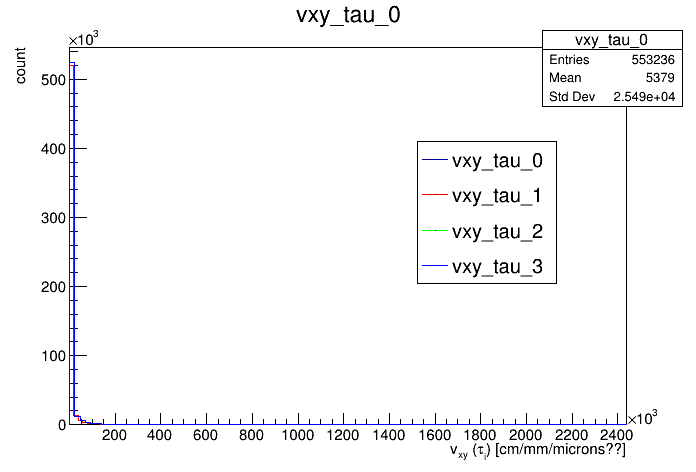

In [118]:
c = ROOT.TCanvas()
h_vxy_tau_0.Draw()
h_vxy_tau_0.GetXaxis().SetTitle("v_{xy} (#tau_{i}) [cm/mm/microns??]")
h_vxy_tau_1.Draw("SAME")
h_vxy_tau_1.SetLineColor(ROOT.kRed)
h_vxy_tau_2.Draw("SAME")
h_vxy_tau_2.SetLineColor(ROOT.kGreen)
h_vxy_tau_3.Draw("SAME")
h_vxy_tau_3.SetLineColor(ROOT.kBlue)
c.Draw()
c.BuildLegend(0.6, 0.4, 0.8, 0.7)

In [97]:
h_vxy_tau_0 = d_tau.Filter("vxy_tau_0 < 1000").Histo1D("vxy_tau_0")
h_vxy_tau_1 = d_tau.Filter("vxy_tau_1 < 1000").Histo1D("vxy_tau_1")
h_vxy_tau_2 = d_tau.Filter("vxy_tau_2 < 1000").Histo1D("vxy_tau_2")
h_vxy_tau_3 = d_tau.Filter("vxy_tau_3 < 1000").Histo1D("vxy_tau_3")

<ROOT.TLegend object ("TPave") at 0x1aff14b0>

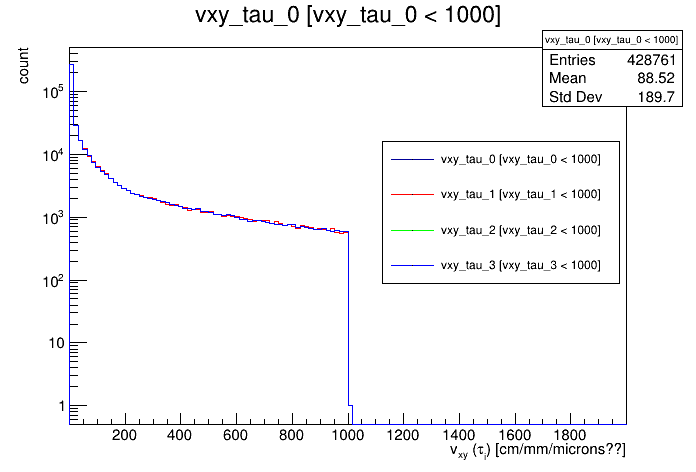

In [109]:
c = ROOT.TCanvas()
h_vxy_tau_0.Draw()
h_vxy_tau_0.GetXaxis().SetTitle("v_{xy} (#tau_{i}) [cm/mm/microns??]")
h_vxy_tau_0.SetName("vxy_tau_0 [vxy_tau_0 < 1000]")
h_vxy_tau_1.Draw("SAME")
h_vxy_tau_1.SetName("vxy_tau_1 [vxy_tau_1 < 1000]")
h_vxy_tau_1.SetTitle("vxy_tau_1 [vxy_tau_1 < 1000]")
h_vxy_tau_1.SetLineColor(ROOT.kRed)
h_vxy_tau_2.Draw("SAME")
h_vxy_tau_2.SetName("vxy_tau_2 [vxy_tau_2 < 1000]")
h_vxy_tau_2.SetTitle("vxy_tau_2 [vxy_tau_2 < 1000]")
h_vxy_tau_2.SetLineColor(ROOT.kGreen)
h_vxy_tau_3.SetName("vxy_tau_3 [vxy_tau_3 < 1000]")
h_vxy_tau_3.SetTitle("vxy_tau_3 [vxy_tau_3 < 1000]")
h_vxy_tau_3.Draw("SAME")
h_vxy_tau_3.SetLineColor(ROOT.kBlue)
c.SetLogy()
c.Draw()
c.BuildLegend(0.55, 0.4, 0.89, 0.7)

<ROOT.TLegend object ("TPave") at 0x1af9ad50>

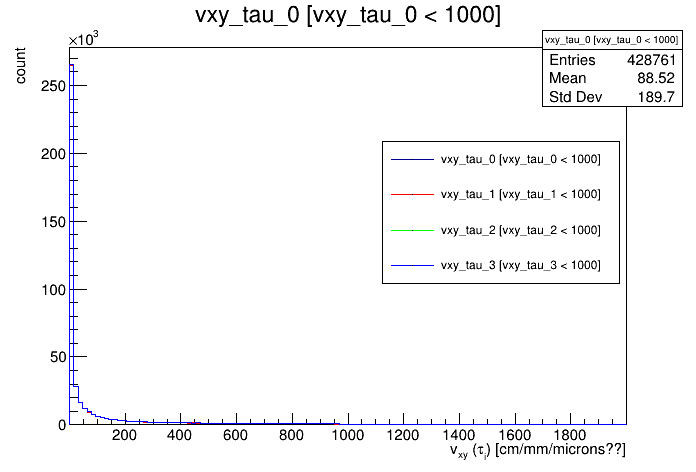

In [110]:
c = ROOT.TCanvas()
h_vxy_tau_0.Draw()
h_vxy_tau_0.GetXaxis().SetTitle("v_{xy} (#tau_{i}) [cm/mm/microns??]")
h_vxy_tau_0.SetName("vxy_tau_0 [vxy_tau_0 < 1000]")
h_vxy_tau_1.Draw("SAME")
h_vxy_tau_1.SetName("vxy_tau_1 [vxy_tau_1 < 1000]")
h_vxy_tau_1.SetTitle("vxy_tau_1 [vxy_tau_1 < 1000]")
h_vxy_tau_1.SetLineColor(ROOT.kRed)
h_vxy_tau_2.Draw("SAME")
h_vxy_tau_2.SetName("vxy_tau_2 [vxy_tau_2 < 1000]")
h_vxy_tau_2.SetTitle("vxy_tau_2 [vxy_tau_2 < 1000]")
h_vxy_tau_2.SetLineColor(ROOT.kGreen)
h_vxy_tau_3.SetName("vxy_tau_3 [vxy_tau_3 < 1000]")
h_vxy_tau_3.SetTitle("vxy_tau_3 [vxy_tau_3 < 1000]")
h_vxy_tau_3.Draw("SAME")
h_vxy_tau_3.SetLineColor(ROOT.kBlue)
c.Draw()
c.BuildLegend(0.55, 0.4, 0.89, 0.7)

In [145]:
d_gluon = d.Define("g_mask", "abs(gen_ID) == 21")
d_gluon = d_gluon.Define("pt_g_0", "gen_pt[g_mask][0]")
d_gluon = d_gluon.Define("pt_g_1", "gen_pt[g_mask][1]")
d_gluon = d_gluon.Define("pt_g_2", "gen_pt[g_mask][2]")
d_gluon = d_gluon.Define("pt_g_3", "gen_pt[g_mask][3]")

In [146]:
h_pt_g_0 = d_gluon.Histo1D("pt_g_0")
h_pt_g_1 = d_gluon.Histo1D("pt_g_1")
h_pt_g_2 = d_gluon.Histo1D("pt_g_2")
h_pt_g_3 = d_gluon.Histo1D("pt_g_3")

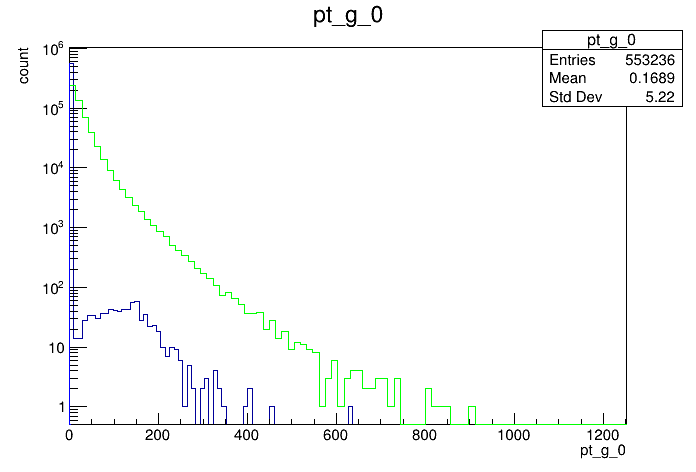

In [147]:
c = ROOT.TCanvas()
h_pt_g_0.Draw()
# h_pt_g_1.Draw()
# h_pt_g_1.SetLineColor(ROOT.kRed)
h_pt_g_2.Draw("SAME")
h_pt_g_2.SetLineColor(ROOT.kGreen)
h_pt_g_3.Draw("SAME")
h_pt_g_3.SetLineColor(ROOT.kBlue)
c.SetLogy()
c.Draw()